In [17]:
import pandas as pd
import os
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
clean_data_GK_path = '../Data/Clean/GK_merge.csv'
clean_data_Player_path = '../Data/Clean/Player_merge.csv'

### Checking initial cleaned data

In [45]:
check_player = pd.read_csv(clean_data_Player_path)
check_player.head(10)

,player_id,name,country_of_birth,city_of_birth,date_of_birth,foot,height_in_cm,contract_expiration_date,image_url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Player,Nation,Pos,Min,Summary_Gls,Summary_Ast,Summary_PK,Summary_PKatt,Summary_Sh,Summary_SoT,Summary_CrdY,Summary_CrdR,Summary_Touches,Summary_Tkl,Summary_Int,Summary_Blocks,Summary_xG,Summary_xAG,Summary_GCA,Summary_Cmp,Summary_pass_Att,Summary_Cmp%,Summary_PrgP,Summary_Carries,Summary_PrgC,Summary_takes_on_Att,Summary_Succ,Passing_PrgDist,Passing_short_Att,Passing_short_Cmp%,Passing_medium_Att,Passing_medium_Cmp%,Passing_long_Att,Passing_long_Cmp%,Passing_Ast,Passing_xA,Passing_KP,Passing_1/3,Passing_PPA,Passing_CrsPA,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Pass_Types_In,Pass_Types_Out,Pass_Types_Str,Pass_Types_Off,Pass_Types_Blocks,Defensive_Actions_TklW,Defensive_Actions_Def 3rd,Defensive_Actions_Mid 3rd,Defensive_Actions_Att 3rd,Defensive_Actions_dribblers_Tkl,Defensive_Actions_Att,Defensive_Actions_Tkl%,Defensive_Actions_Lost,Defensive_Actions_Sh,Defensive_Actions_Pass,Defensive_Actions_Int,Defensive_Actions_Clr,Defensive_Actions_Err,Possession_Def Pen,Possession_Def 3rd,Possession_Mid 3rd,Possession_Att 3rd,Possession_Att Pen,Possession_Live,Possession_Succ%,Possession_Tkld,Possession_Tkld%,Possession_TotDist,Possession_PrgDist,Possession_1/3,Possession_CPA,Possession_Mis,Possession_Dis,Possession_Rec,Possession_PrgR,Miscellaneous_Stats_2CrdY,Miscellaneous_Stats_Fls,Miscellaneous_Stats_Fld,Miscellaneous_Stats_Off,Miscellaneous_Stats_Recov,Miscellaneous_Stats_Won%,total_games,Penalty_Success_%
0,3333,James Milner,England,Leeds,1986-01-04 00:00:00,right,175.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,GB1,Brighton and Hove Albion Football Club,1000000.0,21000000.0,james milner,eng ENG,LM,43.140415,0.000000,0.067766,0.0,0.0,0.286935,0.070818,5.0,0.0,39.755800,1.205739,0.409646,0.503053,0.011538,0.071184,0.086081,28.890110,34.749084,82.173321,3.873016,23.418803,0.822344,0.594017,0.276557,148.894383,16.815629,85.238400,12.787546,87.462637,3.150183,48.379853,0.067766,0.076740,0.846154,3.116606,0.925519,0.341270,30.586691,4.008547,0.551893,0.142857,0.146520,1.791819,3.031746,0.332112,0.117216,0.092796,0.000000,0.153846,0.760684,0.825397,0.531136,0.573871,0.100733,0.678877,1.136752,40.185653,0.457875,0.021368,0.481685,0.409646,0.805250,0.000000,1.275336,8.413919,18.331502,13.227106,0.874847,39.755800,19.642857,0.235653,13.385226,81.879731,39.315629,0.516484,0.206349,0.590965,0.444444,27.117827,4.094017,0.0,0.590354,0.402320,0.126984,2.815018,24.692491,55,0.0
1,7161,Jonas Hofmann,Germany,Heidelberg,1992-07-14 00:00:00,right,176.0,2027-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,L1,Bayer 04 Leverkusen Fußball,7000000.0,16000000.0,jonas hofmann,de GER,AM,72.640065,0.188111,0.221906,0.0,1.0,1.707655,0.722313,6.0,0.0,54.047231,0.663274,0.316775,0.701140,0.191572,0.273168,0.554560,37.366450,47.879072,76.428868,3.977199,29.066775,1.995928,1.052524,0.556189,152.969055,23.225163,84.218893,14.466205,80.794951,6.648616,52.762744,0.221906,0.296498,2.665717,2.274023,1.274023,0.165717,41.517915,6.131922,1.458469,0.289088,0.317182,4.602606,0.947883,3.286645,1.515879,1.081433,0.019137,0.229235,1.343648,0.421010,0.254886,0.217834,0.190554,0.358306,0.982899,22.342834,0.624593,0.006922,0.694218,0.316775,0.315554,0.000000,0.348534,5.058632,22.190554,27.134772,3.291124,54.046010,31.705130,0.489007,28.507818,149.022801,75.152687,1.594463,0.478827,1.114821,0.649837,40.868893,6.537052,0.0,0.463762,0.780130,0.496336,2.942182,8.251995,71,0.0
2,7663,Joaquín,Spain,El Puerto de Santa María,1981-07-21 00:00:00,right,181.0,NaN,https://img.a.transfermarkt.technology/portrai...,ES1,Real Betis Balompié S.A.D.,1500000.0,28000000.0,joaquín,es ESP,RW,20.661342,0.000000,0.068690,0.0,0.0,0.297125,0.132588,2.0,0.0,14.744409,0.1214

In [46]:
check_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Columns: 104 entries, player_id to Penalty_Success_%
dtypes: float64(90), int64(2), object(12)
memory usage: 2.0+ MB


In [50]:
check_player.isna().sum()
Player_nan = check_player.isna().sum()
Player_nan.to_csv('missing_values_player.csv')

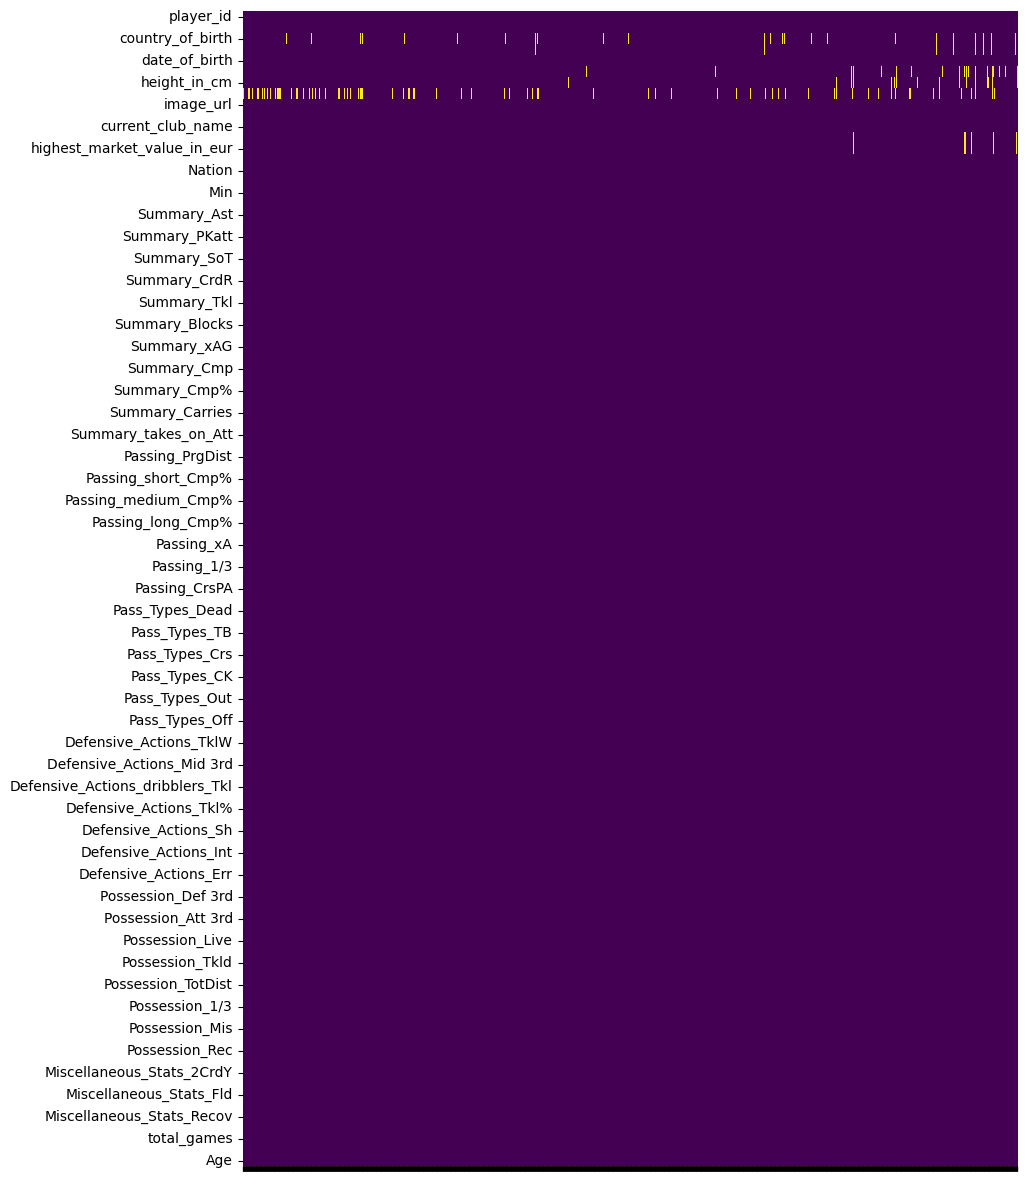

In [39]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(check_player.T.isnull(), cbar=False, xticklabels=True, cmap="viridis", ax=ax)
# Hide x-axis labels
ax.set_xticklabels([])
plt.show()

In [24]:
# Convert to datetime
check_player['date_of_birth'] = pd.to_datetime(check_player['date_of_birth'])
# Calculate Age
current_date = pd.Timestamp.now()
check_player['Age'] = current_date.year - check_player['date_of_birth'].dt.year


In [25]:
check_player.head()

,player_id,name,country_of_birth,city_of_birth,date_of_birth,foot,height_in_cm,contract_expiration_date,image_url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Player,Nation,Pos,Min,Summary_Gls,Summary_Ast,Summary_PK,Summary_PKatt,Summary_Sh,Summary_SoT,Summary_CrdY,Summary_CrdR,Summary_Touches,Summary_Tkl,Summary_Int,Summary_Blocks,Summary_xG,Summary_xAG,Summary_GCA,Summary_Cmp,Summary_pass_Att,Summary_Cmp%,Summary_PrgP,Summary_Carries,Summary_PrgC,Summary_takes_on_Att,Summary_Succ,Passing_PrgDist,Passing_short_Att,Passing_short_Cmp%,Passing_medium_Att,Passing_medium_Cmp%,Passing_long_Att,Passing_long_Cmp%,Passing_Ast,Passing_xA,Passing_KP,Passing_1/3,Passing_PPA,Passing_CrsPA,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Pass_Types_In,Pass_Types_Out,Pass_Types_Str,Pass_Types_Off,Pass_Types_Blocks,Defensive_Actions_TklW,Defensive_Actions_Def 3rd,Defensive_Actions_Mid 3rd,Defensive_Actions_Att 3rd,Defensive_Actions_dribblers_Tkl,Defensive_Actions_Att,Defensive_Actions_Tkl%,Defensive_Actions_Lost,Defensive_Actions_Sh,Defensive_Actions_Pass,Defensive_Actions_Int,Defensive_Actions_Clr,Defensive_Actions_Err,Possession_Def Pen,Possession_Def 3rd,Possession_Mid 3rd,Possession_Att 3rd,Possession_Att Pen,Possession_Live,Possession_Succ%,Possession_Tkld,Possession_Tkld%,Possession_TotDist,Possession_PrgDist,Possession_1/3,Possession_CPA,Possession_Mis,Possession_Dis,Possession_Rec,Possession_PrgR,Miscellaneous_Stats_2CrdY,Miscellaneous_Stats_Fls,Miscellaneous_Stats_Fld,Miscellaneous_Stats_Off,Miscellaneous_Stats_Recov,Miscellaneous_Stats_Won%,total_games,Penalty_Success_%,Age
0,3333,James Milner,England,Leeds,1986-01-04,right,175.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,GB1,Brighton and Hove Albion Football Club,1000000.0,21000000.0,james milner,eng ENG,LM,43.140415,0.000000,0.067766,0.0,0.0,0.286935,0.070818,5.0,0.0,39.755800,1.205739,0.409646,0.503053,0.011538,0.071184,0.086081,28.890110,34.749084,82.173321,3.873016,23.418803,0.822344,0.594017,0.276557,148.894383,16.815629,85.238400,12.787546,87.462637,3.150183,48.379853,0.067766,0.076740,0.846154,3.116606,0.925519,0.341270,30.586691,4.008547,0.551893,0.142857,0.146520,1.791819,3.031746,0.332112,0.117216,0.092796,0.000000,0.153846,0.760684,0.825397,0.531136,0.573871,0.100733,0.678877,1.136752,40.185653,0.457875,0.021368,0.481685,0.409646,0.805250,0.0,1.275336,8.413919,18.331502,13.227106,0.874847,39.755800,19.642857,0.235653,13.385226,81.879731,39.315629,0.516484,0.206349,0.590965,0.444444,27.117827,4.094017,0.0,0.590354,0.402320,0.126984,2.815018,24.692491,55,0.0,38
1,7161,Jonas Hofmann,Germany,Heidelberg,1992-07-14,right,176.0,2027-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,L1,Bayer 04 Leverkusen Fußball,7000000.0,16000000.0,jonas hofmann,de GER,AM,72.640065,0.188111,0.221906,0.0,1.0,1.707655,0.722313,6.0,0.0,54.047231,0.663274,0.316775,0.701140,0.191572,0.273168,0.554560,37.366450,47.879072,76.428868,3.977199,29.066775,1.995928,1.052524,0.556189,152.969055,23.225163,84.218893,14.466205,80.794951,6.648616,52.762744,0.221906,0.296498,2.665717,2.274023,1.274023,0.165717,41.517915,6.131922,1.458469,0.289088,0.317182,4.602606,0.947883,3.286645,1.515879,1.081433,0.019137,0.229235,1.343648,0.421010,0.254886,0.217834,0.190554,0.358306,0.982899,22.342834,0.624593,0.006922,0.694218,0.316775,0.315554,0.0,0.348534,5.058632,22.190554,27.134772,3.291124,54.046010,31.705130,0.489007,28.507818,149.022801,75.152687,1.594463,0.478827,1.114821,0.649837,40.868893,6.537052,0.0,0.463762,0.780130,0.496336,2.942182,8.251995,71,0.0,32
2,7663,Joaquín,Spain,El Puerto de Santa María,1981-07-21,right,181.0,NaN,https://img.a.transfermarkt.technology/portrai...,ES1,Real Betis Balompié S.A.D.,1500000.0,28000000.0,joaquín,es ESP,RW,20.661342,0.000000,0.068690,0.0,0.0,0.297125,0.132588,2.0,0.0,14.744409,0.121406,0.202875,0.330671,0.0201

In [ ]:
check_player.drop('date_of_birth')

In [38]:
check_player.to_csv('../Data/Clean/Player_Final.csv', index=False)

In [27]:
check_GK = pd.read_csv(clean_data_GK_path)
check_GK.head(10)

,player_id,name,country_of_birth,city_of_birth,date_of_birth,foot,height_in_cm,contract_expiration_date,image_url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Player,Nation,Pos,Min,Summary_Gls,Summary_Ast,Summary_PK,Summary_PKatt,Summary_Sh,Summary_SoT,Summary_CrdY,Summary_CrdR,Summary_Touches,Summary_Tkl,Summary_Int,Summary_Blocks,Summary_xG,Summary_xAG,Summary_GCA,Summary_Cmp,Summary_pass_Att,Summary_Cmp%,Summary_PrgP,Summary_Carries,Summary_PrgC,Summary_takes_on_Att,Summary_Succ,Passing_PrgDist,Passing_short_Att,Passing_short_Cmp%,Passing_medium_Att,Passing_medium_Cmp%,Passing_long_Att,Passing_long_Cmp%,Passing_Ast,Passing_xA,Passing_KP,Passing_1/3,Passing_PPA,Passing_CrsPA,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Pass_Types_In,Pass_Types_Out,Pass_Types_Str,Pass_Types_Off,Pass_Types_Blocks,Defensive_Actions_TklW,Defensive_Actions_Def 3rd,Defensive_Actions_Mid 3rd,Defensive_Actions_Att 3rd,Defensive_Actions_dribblers_Tkl,Defensive_Actions_Att,Defensive_Actions_Tkl%,Defensive_Actions_Lost,Defensive_Actions_Sh,Defensive_Actions_Pass,Defensive_Actions_Int,Defensive_Actions_Clr,Defensive_Actions_Err,Possession_Def Pen,Possession_Def 3rd,Possession_Mid 3rd,Possession_Att 3rd,Possession_Att Pen,Possession_Live,Possession_Succ%,Possession_Tkld,Possession_Tkld%,Possession_TotDist,Possession_PrgDist,Possession_1/3,Possession_CPA,Possession_Mis,Possession_Dis,Possession_Rec,Possession_PrgR,Miscellaneous_Stats_2CrdY,Miscellaneous_Stats_Fls,Miscellaneous_Stats_Fld,Miscellaneous_Stats_Off,Miscellaneous_Stats_Recov,Miscellaneous_Stats_Won%,Goalkeeping_SoTA,Goalkeeping_GA,Goalkeeping_Saves,Goalkeeping_Save%,Goalkeeping_PSxG,Goalkeeping_Cmp,Goalkeeping_Att,Goalkeeping_Cmp%,Goalkeeping_Att (GK),Goalkeeping_Thr,Goalkeeping_Launch%,Goalkeeping_AvgLen,Goalkeeping_Att.1,Goalkeeping_Launch%.1,Goalkeeping_AvgLen.1,Goalkeeping_Opp,Goalkeeping_Stp,Goalkeeping_Stp%,Goalkeeping_#OPA,Goalkeeping_AvgDist,total_games,Penalty_Success_%
0,7825,Pepe Reina,Spain,Madrid,1982-08-31 00:00:00,right,188.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,IT1,Calcio Como,600000.0,22000000.0,pepe reina,es ESP,GK,90.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,2.0,0.0,40.302778,0.000000,0.023611,0.0,0.000000,0.034028,0.0,30.613889,38.229167,80.724167,0.000000,24.473611,0.0,0.047222,0.047222,510.609722,6.368056,98.546528,17.827778,98.786528,13.940278,51.322222,0.0,0.0,0.048611,0.395833,0.0,0.0,30.302778,7.884722,2.476389,0.0,0.065278,0.000000,0.000000,0.0,0.0,0.0,0.0,0.041667,0.051389,0.000000,0.000000,0.000000,0.0,0.000000,0.047222,0.000000,0.047222,0.0,0.0,0.023611,0.259722,0.138889,34.484722,40.022222,0.280556,0.000000,0.000000,40.302778,4.722222,0.0,0.0,133.947222,81.898611,0.0,0.0,0.000000,0.0,20.348611,0.0,0.0,0.000000,0.051389,0.0,0.862500,23.750000,4.101389,1.180556,2.959722,68.297917,1.225139,3.031944,9.568056,31.088472,32.779167,5.509722,22.958750,29.173056,5.408333,42.523194,38.380694,15.369444,0.723611,4.908611,0.730556,10.970694,24,0.0
1,12907,Alessio Cragno,Italy,Fiesole,1994-06-28 00:00:00,right,184.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,IT1,Associazione Calcio Monza,1500000.0,20000000.0,alessio cragno,it ITA,GK,90.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,36.108108,0.000000,0.000000,0.0,0.000000,0.000000,0.0,24.681081,33.151351,74.504865,0.000000,19.032432,0.0,0.000000,0.000000,428.194595,5.308108,100.000000,11.297297,100.000000,16.135135,50.511892,0.0,0.0,0.000000,0.643243,0.0,0.0,23.616216,9.535135,3.156757,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.129730,0.000000,0.129730,0.0,0.0,0.000000,0.681081,0.410811,29.713514,36.108108,0.000000,0.000000,0.000000,36.108108,0.000000,0.0,0.0,100.086486,72.308108,0.0,0.0,0.000000,0.0,15.810811,0.0,0.0,0.000000,0.000000,0.0,1.491892,41.081081,4.940541,2.172973,3.

In [51]:
GK_nan = check_GK.isna().sum()
GK_nan.to_csv('missing_values_GK.csv')


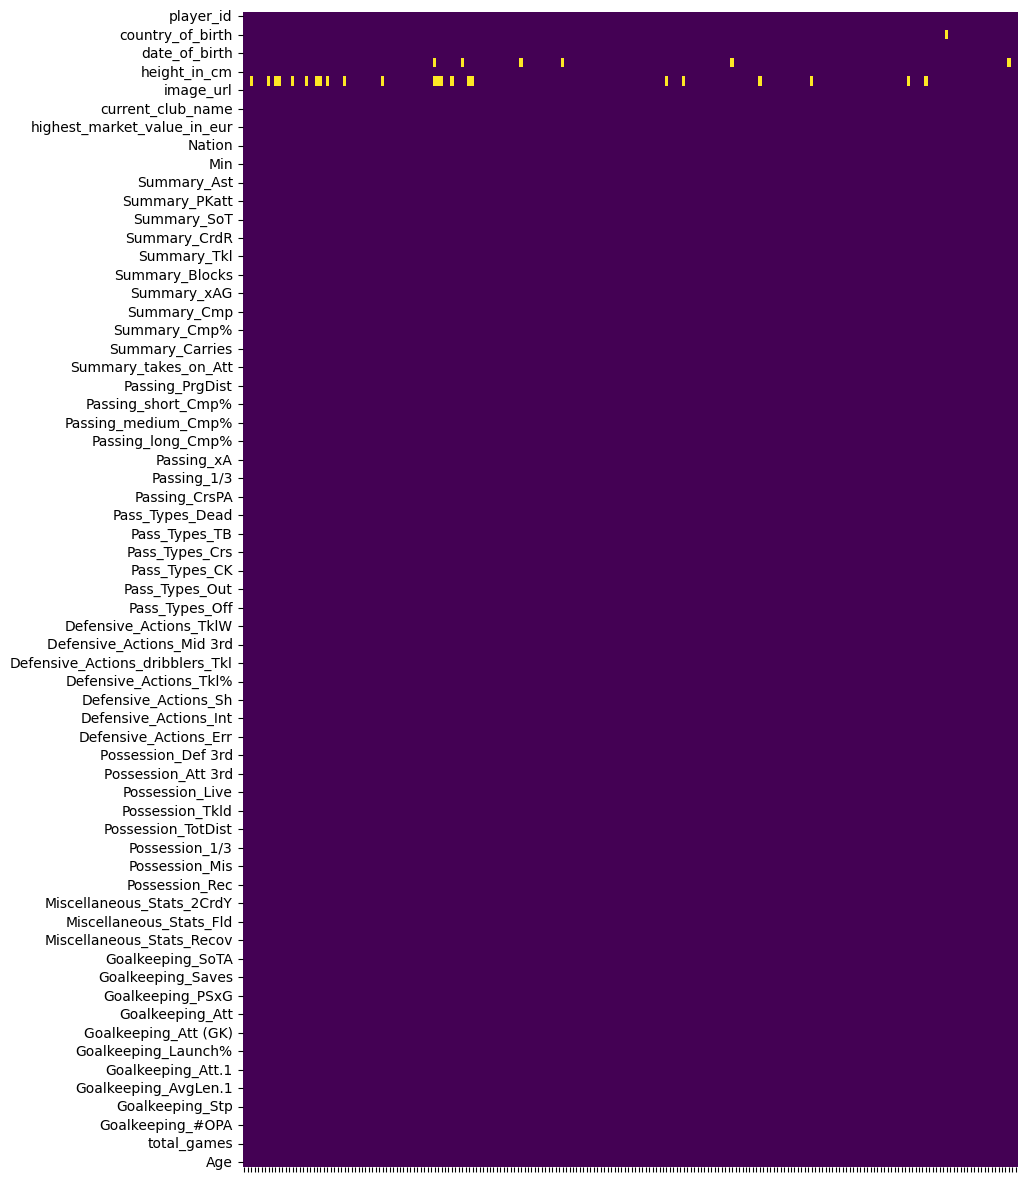

In [36]:
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(check_GK.T.isnull(), cbar=False, xticklabels=True, cmap="viridis", ax=ax)
ax.set_xticklabels([])

plt.show()

In [29]:
# Convert to datetime
check_GK['date_of_birth'] = pd.to_datetime(check_GK['date_of_birth'])
# Calculate Age
current_date = pd.Timestamp.now()
check_GK['Age'] = current_date.year - check_GK['date_of_birth'].dt.year

In [30]:
check_GK.head()

,player_id,name,country_of_birth,city_of_birth,date_of_birth,foot,height_in_cm,contract_expiration_date,image_url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,Player,Nation,Pos,Min,Summary_Gls,Summary_Ast,Summary_PK,Summary_PKatt,Summary_Sh,Summary_SoT,Summary_CrdY,Summary_CrdR,Summary_Touches,Summary_Tkl,Summary_Int,Summary_Blocks,Summary_xG,Summary_xAG,Summary_GCA,Summary_Cmp,Summary_pass_Att,Summary_Cmp%,Summary_PrgP,Summary_Carries,Summary_PrgC,Summary_takes_on_Att,Summary_Succ,Passing_PrgDist,Passing_short_Att,Passing_short_Cmp%,Passing_medium_Att,Passing_medium_Cmp%,Passing_long_Att,Passing_long_Cmp%,Passing_Ast,Passing_xA,Passing_KP,Passing_1/3,Passing_PPA,Passing_CrsPA,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Pass_Types_In,Pass_Types_Out,Pass_Types_Str,Pass_Types_Off,Pass_Types_Blocks,Defensive_Actions_TklW,Defensive_Actions_Def 3rd,Defensive_Actions_Mid 3rd,Defensive_Actions_Att 3rd,Defensive_Actions_dribblers_Tkl,Defensive_Actions_Att,Defensive_Actions_Tkl%,Defensive_Actions_Lost,Defensive_Actions_Sh,Defensive_Actions_Pass,Defensive_Actions_Int,Defensive_Actions_Clr,Defensive_Actions_Err,Possession_Def Pen,Possession_Def 3rd,Possession_Mid 3rd,Possession_Att 3rd,Possession_Att Pen,Possession_Live,Possession_Succ%,Possession_Tkld,Possession_Tkld%,Possession_TotDist,Possession_PrgDist,Possession_1/3,Possession_CPA,Possession_Mis,Possession_Dis,Possession_Rec,Possession_PrgR,Miscellaneous_Stats_2CrdY,Miscellaneous_Stats_Fls,Miscellaneous_Stats_Fld,Miscellaneous_Stats_Off,Miscellaneous_Stats_Recov,Miscellaneous_Stats_Won%,Goalkeeping_SoTA,Goalkeeping_GA,Goalkeeping_Saves,Goalkeeping_Save%,Goalkeeping_PSxG,Goalkeeping_Cmp,Goalkeeping_Att,Goalkeeping_Cmp%,Goalkeeping_Att (GK),Goalkeeping_Thr,Goalkeeping_Launch%,Goalkeeping_AvgLen,Goalkeeping_Att.1,Goalkeeping_Launch%.1,Goalkeeping_AvgLen.1,Goalkeeping_Opp,Goalkeeping_Stp,Goalkeeping_Stp%,Goalkeeping_#OPA,Goalkeeping_AvgDist,total_games,Penalty_Success_%,Age
0,7825,Pepe Reina,Spain,Madrid,1982-08-31,right,188.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,IT1,Calcio Como,600000.0,22000000.0,pepe reina,es ESP,GK,90.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,2.0,0.0,40.302778,0.000000,0.023611,0.0,0.000000,0.034028,0.0,30.613889,38.229167,80.724167,0.000000,24.473611,0.0,0.047222,0.047222,510.609722,6.368056,98.546528,17.827778,98.786528,13.940278,51.322222,0.0,0.0,0.048611,0.395833,0.0,0.0,30.302778,7.884722,2.476389,0.0,0.065278,0.0,0.000000,0.0,0.0,0.0,0.0,0.041667,0.051389,0.000000,0.000000,0.0,0.0,0.000000,0.047222,0.000000,0.047222,0.0,0.0,0.023611,0.259722,0.138889,34.484722,40.022222,0.280556,0.000000,0.000000,40.302778,4.722222,0.0,0.0,133.947222,81.898611,0.0,0.0,0.000000,0.0,20.348611,0.0,0.0,0.000000,0.051389,0.0,0.862500,23.750000,4.101389,1.180556,2.959722,68.297917,1.225139,3.031944,9.568056,31.088472,32.779167,5.509722,22.958750,29.173056,5.408333,42.523194,38.380694,15.369444,0.723611,4.908611,0.730556,10.970694,24,0.0,42
1,12907,Alessio Cragno,Italy,Fiesole,1994-06-28,right,184.0,2025-06-30 00:00:00,https://img.a.transfermarkt.technology/portrai...,IT1,Associazione Calcio Monza,1500000.0,20000000.0,alessio cragno,it ITA,GK,90.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,36.108108,0.000000,0.000000,0.0,0.000000,0.000000,0.0,24.681081,33.151351,74.504865,0.000000,19.032432,0.0,0.000000,0.000000,428.194595,5.308108,100.000000,11.297297,100.000000,16.135135,50.511892,0.0,0.0,0.000000,0.643243,0.0,0.0,23.616216,9.535135,3.156757,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.129730,0.000000,0.129730,0.0,0.0,0.000000,0.681081,0.410811,29.713514,36.108108,0.000000,0.000000,0.000000,36.108108,0.000000,0.0,0.0,100.086486,72.308108,0.0,0.0,0.000000,0.0,15.810811,0.0,0.0,0.000000,0.000000,0.0,1.491892,41.081081,4.940541,2.172973,3.000000,50.761081,1.735135,5.432

In [ ]:
#check_GK.drop('date_of_birth')

In [37]:
check_GK.to_csv('../Data/Clean/GK_Final.csv', index=False)

----------------------

In [26]:
all_nan_players = {}
for attribute in check.columns[1:]:  # Exclude 'Player' column
    players = check.groupby('Player')[attribute].apply(lambda x: x.isna().all())
    all_nan_players[attribute] = players[players].index.tolist()

# Output results
for attribute, players in all_nan_players.items():
    print(f"Players with all NaN in '{attribute}': {players}")

KeyboardInterrupt: 

In [345]:
print(check.loc[(check['Player'] == 'Diego Llorente') & (check['game_id'] == 328)])

               Player     #  Nation Pos     Age  Min  Gls  Ast   PK  PKatt  \
18989  Diego Llorente  14.0  es ESP  CB  30-253  9.0  0.0  0.0  0.0    0.0   
18990  Diego Llorente  14.0  es ESP  CB  30-253  9.0  0.0  0.0  0.0    0.0   

        Sh  SoT  CrdY  CrdR  Touches  Tkl  Int  Blocks   xG  npxG  xAG  SCA  \
18989  0.0  0.0   0.0   0.0     60.0  1.0  0.0     0.0  0.0   0.0  0.0  1.0   
18990  0.0  0.0   0.0   0.0     60.0  1.0  0.0     0.0  0.0   0.0  0.0  1.0   

       GCA  Cmp_x  Att_x  Cmp%_x  PrgP  Carries  PrgC  Att_x.1  Succ  SoTA  \
18989  1.0   48.0   55.0    87.3   3.0     25.0   1.0      0.0   0.0   NaN   
18990  1.0   48.0   55.0    87.3   3.0     25.0   1.0      0.0   0.0   NaN   

       GA  Saves  Save%  PSxG  Cmp_y  Att_y  Cmp%_y  Att (GK)  Thr  Launch%  \
18989 NaN    NaN    NaN   NaN    NaN    NaN     NaN       NaN  NaN      NaN   
18990 NaN    NaN    NaN   NaN    NaN    NaN     NaN       NaN  NaN      NaN   

       AvgLen  Att_y.1  Launch%.1  AvgLen.1  Opp  Stp 

In [ ]:
check.loc[(check['Player'] == 'Diego Llorente') & (check['game_id'] == 328), 'Min'] = 9
#check.drop('Country', axis='columns')

In [33]:
duplicate = check[check.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name


In [29]:
check = check.drop_duplicates()

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xAG,SCA,GCA,Cmp_x,Att_x,Cmp%_x,PrgP,Carries,PrgC,Att_x.1,Succ,SoTA,GA,Saves,Save%,PSxG,Cmp_y,Att_y,Cmp%_y,Att (GK),Thr,Launch%,AvgLen,Att_y.1,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist,home,game_id,Wk,season,Date,Team Name
0,Ameen Al-Dakhil,28.0,be BEL,CB,21-158,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,32.0,38.0,84.2,3.0,24.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
1,Anass Zaroury,19.0,ma MAR,FW,22-277,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,12.0,83.3,0.0,6.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
2,Benson Manuel,10.0,ao ANG,FW,26-136,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,80.0,0.0,7.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
3,Connor Roberts,14.0,wls WAL,RB,27-322,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,46.0,84.8,4.0,17.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
4,Dara O'Shea,2.0,ie IRL,CB,24-160,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,42.0,56.0,75.0,3.0,27.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,2023-2024,2023-08-11,Burnley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47393,Jordan Lotomba,23.0,ch SUI,"LB,WB",25-233,26.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,15.0,1.0,2.0,0.0,0.2,0.2,0.0,0.0,0.0,6.0,9.0,66.7,0.0,9.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47394,Khéphren Thuram,19.0,fr FRA,"CM,DM",23-054,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,46.0,87.0,2.0,43.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47395,Mohamed Ali Cho,25.0,fr FRA,"RW,LW",20-121,17.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.1,1.0,0.0,4.0,4.0,100.0,1.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice
47396,Pablo Rosario,8.0,nl NED,CB,27-133,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52.0,56.0,92.9,3.0,52.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,305,34.0,2023-2024,2024-05-19,Nice


In [34]:
check.to_csv(clean_data_Player_path, index=False)

In [7]:
check = pd.read_csv(clean_data_GK_path)
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Columns: 114 entries, Player to Penalty_Success_%
dtypes: float64(108), int64(1), object(5)
memory usage: 351.0+ KB
